# Monte Carlo Simulation

*Disclaimer: The information provided in this analysis of AAPL, GOOG, AMZN, and MSFT financial data is for educational purposes only and should not be considered as financial advice. The results and insights presented may not accurately reflect future performance, and investing in these stocks involves significant risk. It is strongly recommended to consult with a qualified financial advisor before making any investment decisions.*

#### Download Stock Price Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of stocks
tickers = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

# Define a color for each stock
colors = {'AAPL': 'blue', 'GOOG': 'green', 'AMZN': 'orange', 'MSFT': 'red'}

# Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

[*********************100%***********************]  4 of 4 completed


#### Monte Carlo Paramerts and Functions

In [ ]:
# Monte Carlo parameters
simulations = 1000  # Number of simulations
time_horizon = 252  # Days (252 trading days in a year)

# Function to perform Monte Carlo simulation for a stock
def monte_carlo_simulation(stock_close_prices, simulations, time_horizon):
    # Calculate daily returns
    daily_returns = stock_close_prices.pct_change().dropna()

    # Mean and standard deviation of daily returns
    mean_return = daily_returns.mean()
    std_dev_return = daily_returns.std()

    # Create an array to hold simulations
    simulation_matrix = np.zeros((time_horizon, simulations))

    # Start simulation from the latest closing price
    starting_price = stock_close_prices.iloc[-1]

    for i in range(simulations):
        # Simulate the price over the time horizon
        simulated_prices = [starting_price]
        for t in range(1, time_horizon):
            # Random normal variate for price movement
            price_change = np.random.normal(mean_return, std_dev_return)
            simulated_price = simulated_prices[t-1] * (1 + price_change)
            simulated_prices.append(simulated_price)

        simulation_matrix[:, i] = simulated_prices

    return simulation_matrix

#### Plot Monte Carlo Simulation and Distribution of Simulated Pricesfor each stocks

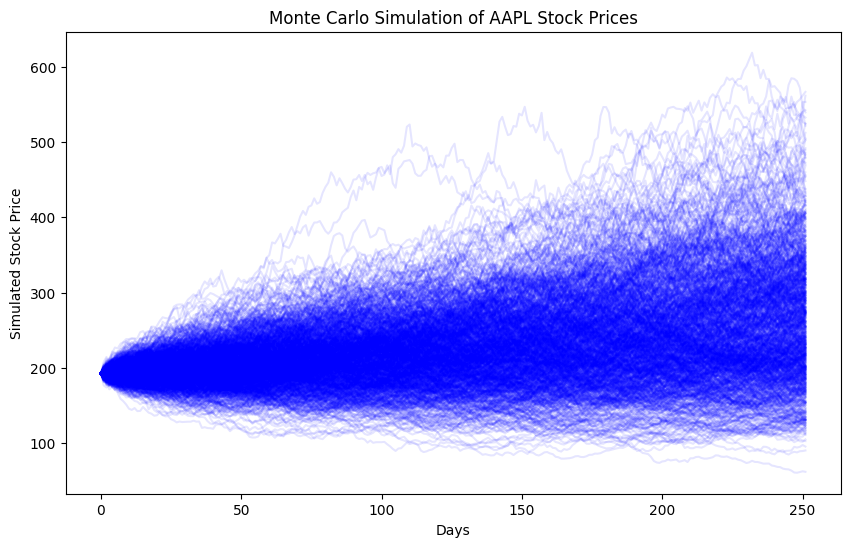

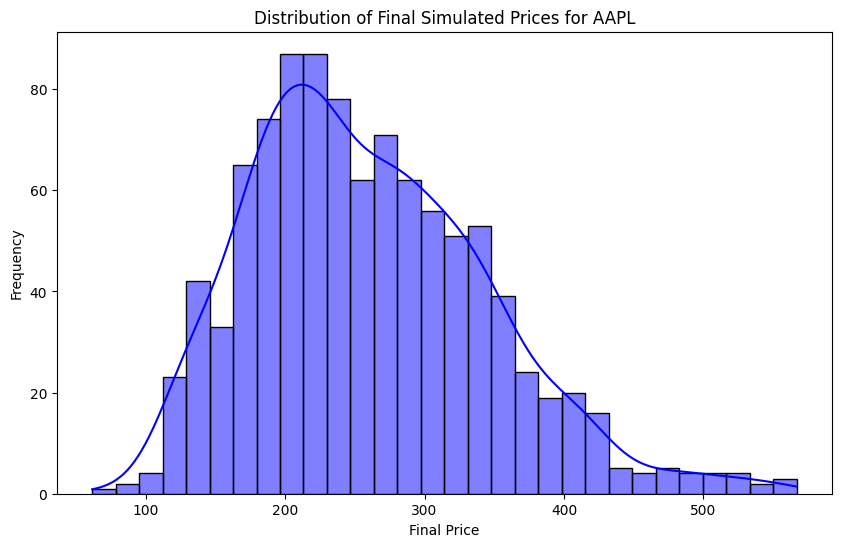

Statistics for AAPL:
Mean Final Price: 259.870026373715
Median Final Price: 247.97118202378715
5th Percentile Final Price: 134.79133990803487
95th Percentile Final Price: 409.3206876678329


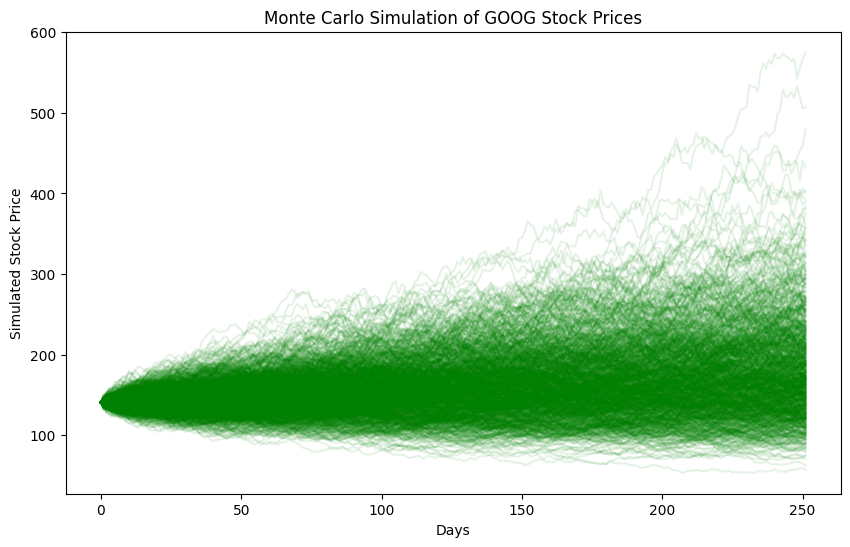

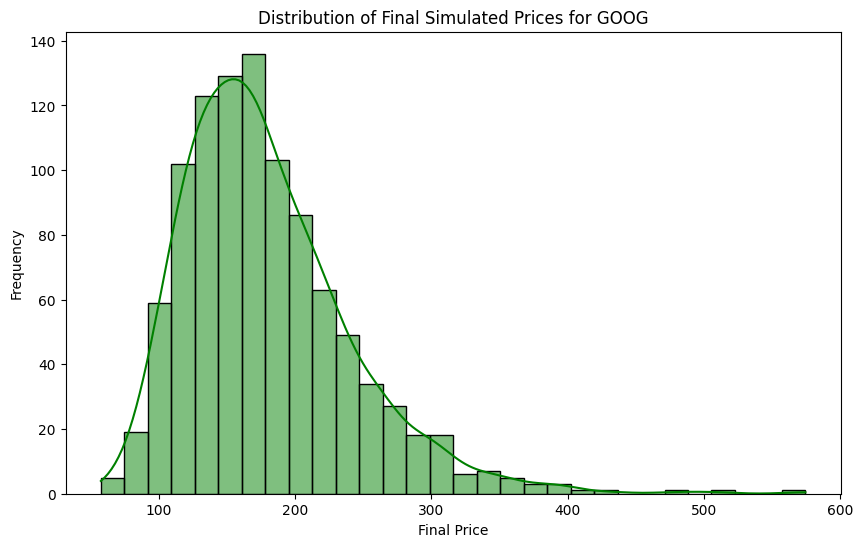

Statistics for GOOG:
Mean Final Price: 178.90719976706606
Median Final Price: 168.7632440785067
5th Percentile Final Price: 101.17660343530609
95th Percentile Final Price: 294.6799101380896


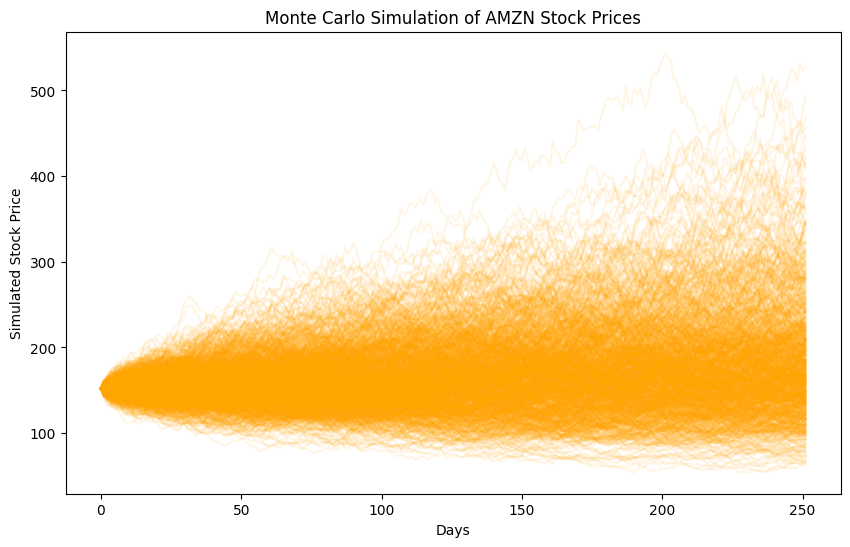

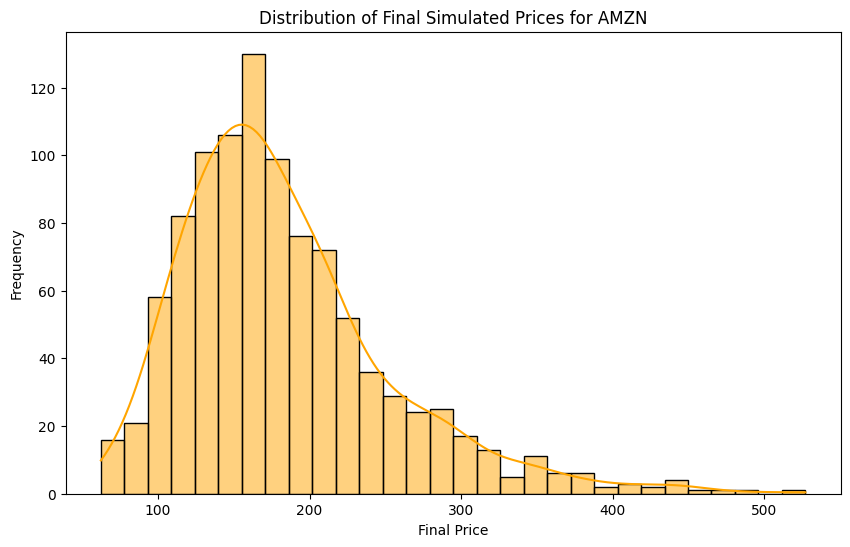

Statistics for AMZN:
Mean Final Price: 183.27739056388057
Median Final Price: 169.18247430220134
5th Percentile Final Price: 98.93392017483609
95th Percentile Final Price: 315.6071746035815


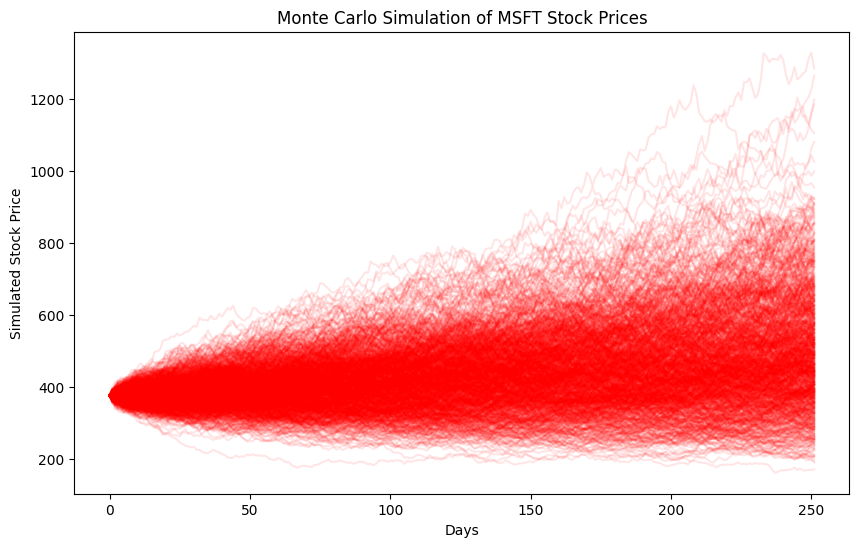

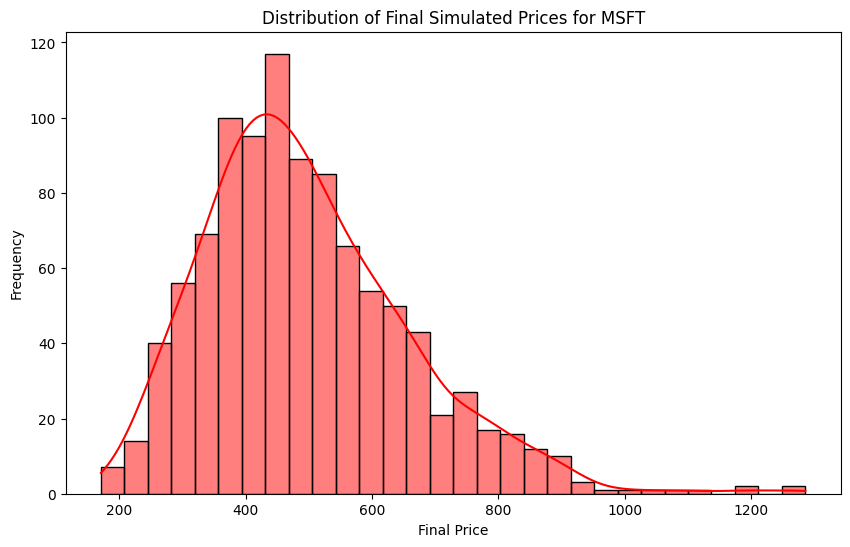

Statistics for MSFT:
Mean Final Price: 496.03421564984137
Median Final Price: 469.3120460988114
5th Percentile Final Price: 269.7217355490869
95th Percentile Final Price: 799.1759134497884


In [ ]:
# Plot Monte Carlo simulation for each stock in separate graphs with different colors
for ticker in tickers:
    stock_close_prices = stock_data[ticker]['Close']

    # Perform Monte Carlo simulation
    simulation_results = monte_carlo_simulation(stock_close_prices, simulations, time_horizon)

    # Capture the final prices from the simulations (at the last time step)
    ending_prices = simulation_results[-1, :]

    # Create a new figure for each ticker
    plt.figure(figsize=(10, 6))

    # Plot each simulation in a unique color for each ticker
    for i in range(simulations):
        plt.plot(simulation_results[:, i], color=colors[ticker], alpha=0.1)  # Use color for the ticker

    # Add titles and labels for the simulation plot
    plt.title(f'Monte Carlo Simulation of {ticker} Stock Prices')
    plt.xlabel('Days')
    plt.ylabel('Simulated Stock Price')
    plt.show()

    # Plot distribution of final simulated prices
    plt.figure(figsize=(10, 6))
    sns.histplot(ending_prices, kde=True, color=colors[ticker], bins=30)
    plt.title(f'Distribution of Final Simulated Prices for {ticker}')
    plt.xlabel('Final Price')
    plt.ylabel('Frequency')
    plt.show()

    # Print statistical measures
    print(f"Statistics for {ticker}:")
    print(f"Mean Final Price: {np.mean(ending_prices)}")
    print(f"Median Final Price: {np.median(ending_prices)}")
    print(f"5th Percentile Final Price: {np.percentile(ending_prices, 5)}")
    print(f"95th Percentile Final Price: {np.percentile(ending_prices, 95)}")

